# Virtual Pruning

## Importing the digitized structure

In [1]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [2]:
from matplotlib.pyplot import *
import mtgplot as mp

In [3]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': 'bEykuvZQCjx5lA7pFqxSRxwPY', 'data': b'x\xda\xac\x9d\t|S\xd5\xb6\xff\xd3\x11\x0cC\x…


# Vegetative growth after pruning

In [4]:
import pruning ; reload(pruning)
from pruning import *

In [50]:
pruned = prune(g, 60)

In [51]:
intensity = continuous_intensity_from_pruned(pruned)
print(intensity, intensity_level(intensity))

0.16778547117723258 T1


In [52]:
prunedrepr = mp.representation(pruned, wood = False, leaves=True)

In [53]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [54]:
TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

In [55]:
#TrPPFD_min, Zeta_min, Zeta_12H

<AxesSubplot:>

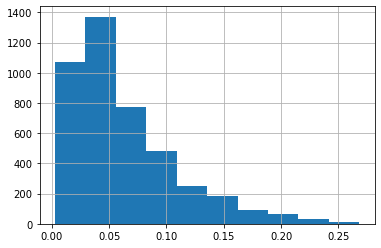

In [56]:
TrPPFD_min.hist()

<AxesSubplot:>

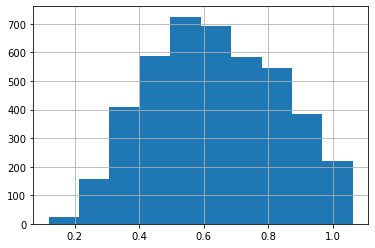

In [57]:
Zeta_min.hist()

<AxesSubplot:>

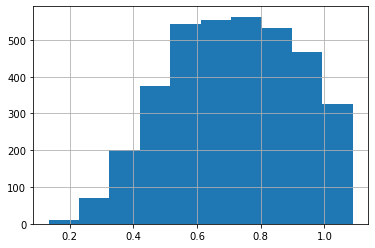

In [58]:
Zeta_12H.hist()

In [59]:
mp.plot_projection(prunedrepr, Zeta_12H)

SceneWidget(scenes=[{'id': '3FqmLMiiHaa1lXdYCRIsYbFrH', 'data': b'x\xda\x94\xdd\x07\\\xd3\xd8\x03\x07p\xdc\xb8…

In [60]:
import regrowth_base; reload(regrowth_base)
from regrowth_base import plot_growth
import regrowth_emma; reload(regrowth_emma)
from regrowth_emma import *

In [61]:

regrowth, newids = growth(pruned, TrPPFD_min, Zeta_min, Zeta_12H)

print('Created', len(newids), 'new GUs')
plot_growth(regrowth, leaves=True, gc=True)

Should examine 2988 terminal GUs.
Processed 180 pruned terminal GU and 2772 unpruned terminal GU and  36 ignored.
Created 2016 new GUs


SceneWidget(scenes=[{'id': 'puuLE3z6GdYX0AlBzTBisten4', 'data': b'x\xda\xdc\xbd\x07\\\x13K\xfb\xf6\x0f(\x8a\xa…

In [62]:
def date_histo(g):
    from matplotlib.pyplot import hist, show
    from collections import Counter
    from datetime import timedelta
    c = list(Counter(g.property('BurstDate').values()).items())
    c.sort(key = lambda v : v[0])
    mindate = c[0][0]
    maxdate = c[-1][0]
    c = dict(c)
    r = range(0,(maxdate-mindate).days)
    d = [mindate+timedelta(days=d) for d in r]
    v = [ c.get(di,0) for di in d]
    bar(r,v)
    xticks(r,d, rotation=90)
    show()

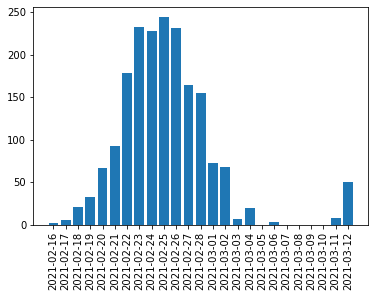

In [63]:
date_histo(regrowth)

In [64]:
plot_growth_dynamic(regrowth)

2021-02-16 --- 2021-03-13


/Users/fboudon/Develop/oagit/virtualpruning/notebooks/mtgplot.py:255: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if burstdate and burstdate > todate: return


SceneWidget(scenes=[{'id': 'oBHgGSYOfuYu2zUDbZJIxl9lx', 'data': b'x\xda\xac\x9d\x07T\x13\xd9\x17\xc6)\x16\xc4^…

interactive(children=(IntSlider(value=25, description='x', max=25), Button(description='Run Interact', style=B…

<function regrowth_base.plot_growth_dynamic.<locals>.plot_dyn(x)>

In [65]:
def nb_children_histo(g):
    def severity(vid):
        return g.property('cuted').get(vid,0)

    ancestors = [get_parent(g,vid) if vid in g.property('BurstDate') else vid for vid in get_all_terminal_gus(g) ]
    ancestors = set(ancestors)
    
    values = [[] for i in range(4)]
    for vid in ancestors:
        values[severity(vid)].append(g.nb_children(vid))
    figure(figsize=(18,4))
    for order, v in enumerate(values):
        if len(v) > 0:
            subplot(220+order+1)
            hist(v, bins=np.arange(0,max(1,max(v)))-0.5)
            print(len(v),(np.mean(v), np.std(v)),(np.mean([vi for vi in v if vi > 0]), np.std([vi for vi in v if vi > 0])),(np.min(v), np.max(v)))
    show()
    

2988 (0.6619812583668006, 1.3195321205077564) (2.2893518518518516, 1.515224450521946) (0, 11)


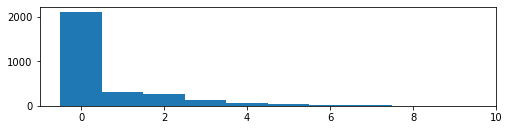

In [66]:
nb_children_histo(regrowth)

Les **longueurs d'UCs générées** suivent la loi normale du modèle précédent. A corriger avec données 2017

## Gap fraction

In [67]:
import gapfraction ; reload(gapfraction)
from gapfraction import gapfraction_dynamic

In [68]:
gft = gapfraction_dynamic(regrowth)

In [69]:
pruningdate = date(2021,2,1)
gf0 = gap_fraction(g)

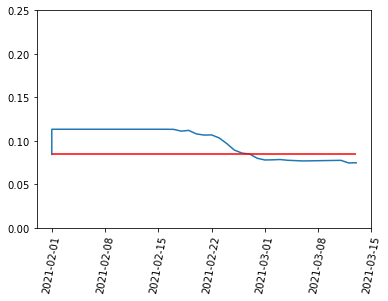

In [70]:
from matplotlib.pyplot import *
plot([pruningdate,pruningdate]+[d for d,g in gft],[gf0,gft[0][1]]+[g for d,g in gft])
hlines(gf0,pruningdate,gft[-1][0],color='r')
ylim(0,0.25)
xticks(rotation = 80)
show()

# leaf area produced at the tree scale vs. leaf area removed by pruning

In [ ]:
def leaf_area_produced(mtg,newids):
    newids = growth(t3, listidprunedT3, T3)
    totalleafarea = sum([individual_leafarea_unpruned() for vid in newids])
    growth(t3, listidprunedT3, T3)
    return totalleafarea

# améliorations possibles du modèle

In [ ]:
def simulation(mtg, nbcuts):
    from allometry import gu_leaf_area
    # characterize before pruning
    # nb of terminal units
    nbterminalunits = len(get_all_terminal_gus(mtg))

    # determine pruning
    listidpruned = define_pruning(mtg, nbcuts, None)
    #pruningprop = tag_pruning(mtg, listidpruned)

    # characterize pruning
    # - intensity
    intensity = intensity_level(continuous_intensity(g,listidpruned))
    if intensity == T2:
        raise ValueError('Intensity', intensity)
        
    #  - nb of terminal units
    nbremovedGU = sum([sum([len(get_descendants_gus_from_ancestor(mtg, vid))-1 for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # - surface foliaire retire 
    removed_leaf_area = sum([sum([gu_leaf_area(get_gu_diameter(mtg, vid)) for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # apply pruning
    prunedmtg = apply_pruning(mtg, listidpruned)
    
    prunedrepr = mp.representation(pruned, wood = False, leaves=True)
    TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

    # characterize pruning
    # nb of terminal units
    
    # apply growth    
    growthmtg, newGUs = growth(prunedmtg, TrPPFD_min, Zeta_min, Zeta_12H)

    allpruned = pruned

    # characterize growth
    nbgeneratedGU = len(newGUs)
    generated_leaf_area_pruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if vid in allpruned])
    generated_leaf_area_unpruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if not (vid in allpruned)])
    
    return (nbterminalunits, nbremovedGU, nbgeneratedGU), (removed_leaf_area, generated_leaf_area_pruned, generated_leaf_area_unpruned)
    

In [ ]:
units0, la0 = simulation(g, 0)
print(units0, la0)

In [ ]:
units20, la20 = simulation(g, 20)
print(units20, la20)

In [ ]:
units60, la60 = simulation(g, 60)
print(units60, la60)

In [ ]:
#units0060, la0060 = pipeline(g, (0,30,76))
#print(units0060, la0060)

In [ ]:
print(la0[1]-la0[0])
print(la20[1]-la20[0])
print(la60[1]-la60[0])


In [ ]:
def process_range(mtg, cutrange = (0,20), cuttype = (1,1,1), nbtests = 1):
    if type(cutrange) == int:
        cutrange = (0, cutrange)
    import numpy as np
    gla = []
    gunits = [] 
    cuts = []
    for c in range(*cutrange):
        for i in range(nbtests):
            print('process',c,'-',i)
            try:
                units, la = simulation(mtg, [c*i for i in cuttype])
            except ValueError as e:
                print(e)
                continue
            gla.append(la)
            gunits.append(units)
            cuts.append(c)
    gla = np.array(gla)
    gunits = np.array(gunits)
    return cuts, gla, gunits
    

In [ ]:
cuts76, las76, units76 = process_range(g,(0,180,5), nbtests = 1)


In [ ]:
def plot_cutrange(cuts, las, units):
    figure(figsize=(12,6))
    #subplot(121)
    normalproduction = np.mean(las[np.where(np.isin(cuts,[0]))[0],2])
    plot(cuts,las[:,0],'.',label='removed leaf area')
    plot(cuts,las[:,1],'.',label='generated leaf area from pruned GU')
    plot(cuts,las[:,2],'.',label='generated leaf area from unpruned GU')
    plot(cuts,las[:,1]+las[:,2],'.',label='generated leaf area')
    plot(cuts,(las[:,1]+las[:,2])-(las[:,0]+normalproduction),'.',label='increase of leaf area (compared to To)')
    legend()
    show()
    figure(figsize=(12,6))
    #subplot(122)
    plot(cuts,units[:,0],'.',label='nb terminal units')
    plot(cuts,units[:,1],'.',label='nb removed GU')
    plot(cuts,units[:,2],'.',label='nb generated GU')
    legend()
    show()


In [ ]:
plot_cutrange(cuts76, las76, units76)


In [ ]:

cuts, las, units = process_range(g,(0,300,5), cuttype = (1,0,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,300,5), cuttype = (0,1,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,80,2), cuttype = (0,0,1), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)